<a href="https://colab.research.google.com/github/Nduta1/Walmart-Sales-Project/blob/main/Walmart_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
Walmart_data = pd.read_csv('Walmart_Sales.csv')

In [2]:
# Sort data by store number and date
Walmart_data = Walmart_data.sort_values(by=['Store', 'Date'])
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
34,1,1/10/2010,1453329.50,0,71.89,2.603,211.671989,7.838
60,1,1/4/2011,1495064.75,0,59.17,3.524,214.837166,7.682
121,1,1/6/2012,1624477.58,0,77.95,3.501,221.747214,7.143
73,1,1/7/2011,1488538.09,0,85.55,3.524,215.184137,7.962
44,1,10/12/2010,1682614.26,0,46.33,2.843,211.465953,7.838


In [10]:
# Convert Date to MM-DD-YYYY format
Walmart_data['Date'] = pd.to_datetime(Walmart_data['Date'], format='mixed').dt.strftime('%m-%d-%Y')

In [11]:
# Round Weekly Sales to the nearest 2 decimal places
Walmart_data['Weekly_Sales'] = Walmart_data['Weekly_Sales'].round(2)

In [12]:
# Round Temperature to the nearest whole number
Walmart_data['Temperature'] = Walmart_data['Temperature'].round()

In [13]:
# Round Fuel Price to the nearest 2 decimal places
Walmart_data['Fuel_Price'] = Walmart_data['Fuel_Price'].round(2)

In [14]:
# Round CPI to the nearest 3 decimal places
Walmart_data['CPI'] = Walmart_data['CPI'].round(3)

In [15]:
# Round Unemployment to the nearest 3 decimal places
Walmart_data['Unemployment'] = Walmart_data['Unemployment'].round(3)

In [16]:
# Check for missing data
missing_data = Walmart_data.isnull().sum()

In [17]:
# Fill missing data if any (example: forward fill)
data = Walmart_data.fillna(method='ffill')

In [18]:
print("Data cleaning completed.")
print(data.head())
print("Missing data count after cleaning:", missing_data)

Data cleaning completed.
     Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
34       1  01-10-2010    1453329.50             0         72.0        2.60   
60       1  01-04-2011    1495064.75             0         59.0        3.52   
121      1  01-06-2012    1624477.58             0         78.0        3.50   
73       1  01-07-2011    1488538.09             0         86.0        3.52   
44       1  10-12-2010    1682614.26             0         46.0        2.84   

         CPI  Unemployment  
34   211.672         7.838  
60   214.837         7.682  
121  221.747         7.143  
73   215.184         7.962  
44   211.466         7.838  
Missing data count after cleaning: Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Holidays affecting weekly sales the most:
Date
11-25-2011    1.479858e+06
11-26-2010    1.462689e+06
10-02-2012    1.111320e+06
12-02-2010    1.074148e+06
07-09-2012    1.074001e+06
11-02-2011    1.051915e+06
09-09-2011    1.039183e+06
12-30-2011    1.023166e+06
10-09-2010    1.014098e+06
12-31-2010    8.985004e+05
Name: Weekly_Sales, dtype: float64
Store with the lowest unemployment rate:
Store               4
Unemployment    3.879
Name: 569, dtype: object
Store with the highest unemployment rate:
Store               12
Unemployment    14.313
Name: 1607, dtype: object
Overall correlation between CPI and Weekly Sales: -0.07263407421666308
Correlation between CPI and Weekly Sales (Non-Holiday): -0.07193940448927562
Correlation between CPI and Weekly Sales (Holiday): -0.08097042519498718


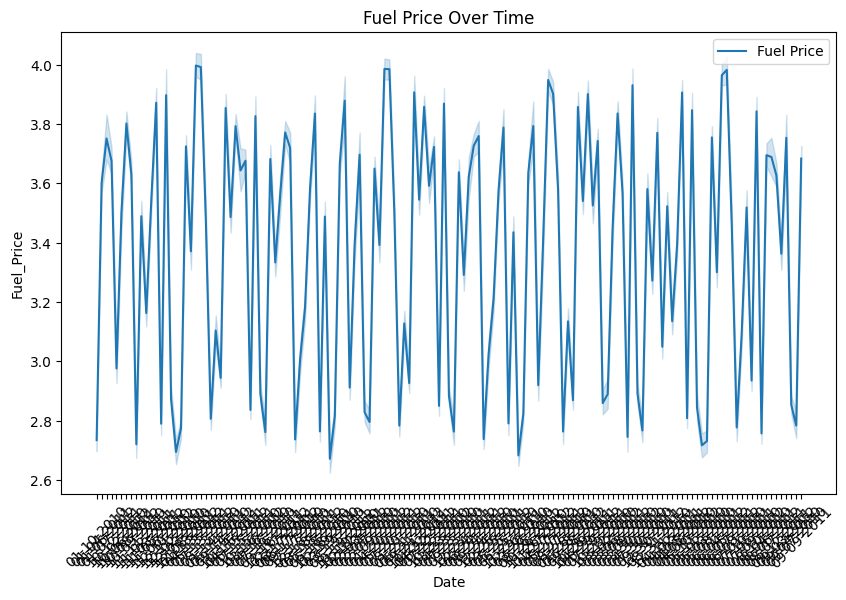

Fuel Price compared to other fields:
              Fuel_Price  Weekly_Sales       CPI  Unemployment
Fuel_Price      1.000000      0.009515 -0.170572     -0.035039
Weekly_Sales    0.009515      1.000000 -0.072634     -0.106176
CPI            -0.170572     -0.072634  1.000000     -0.302020
Unemployment   -0.035039     -0.106176 -0.302020      1.000000
              Fuel_Price  Weekly_Sales       CPI  Unemployment
Fuel_Price      1.000000      0.009515 -0.170572     -0.035039
Weekly_Sales    0.009515      1.000000 -0.072634     -0.106176
CPI            -0.170572     -0.072634  1.000000     -0.302020
Unemployment   -0.035039     -0.106176 -0.302020      1.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of holidays affecting weekly sales
holiday_sales = data[data['Holiday_Flag'] == 1]
average_holiday_sales = holiday_sales.groupby('Date')['Weekly_Sales'].mean().sort_values(ascending=False)
print("Holidays affecting weekly sales the most:")
print(average_holiday_sales)

# Stores with lowest and highest unemployment rate
lowest_unemployment = data.loc[data['Unemployment'].idxmin()]
highest_unemployment = data.loc[data['Unemployment'].idxmax()]
print("Store with the lowest unemployment rate:")
print(lowest_unemployment[['Store', 'Unemployment']])
print("Store with the highest unemployment rate:")
print(highest_unemployment[['Store', 'Unemployment']])

# Correlation between CPI and Weekly Sales
correlation = data[['CPI', 'Weekly_Sales']].corr().iloc[0, 1]
print(f"Overall correlation between CPI and Weekly Sales: {correlation}")

# Correlation with Holiday Flag
correlation_non_holiday = data[data['Holiday_Flag'] == 0][['CPI', 'Weekly_Sales']].corr().iloc[0, 1]
correlation_holiday = data[data['Holiday_Flag'] == 1][['CPI', 'Weekly_Sales']].corr().iloc[0, 1]
print(f"Correlation between CPI and Weekly Sales (Non-Holiday): {correlation_non_holiday}")
print(f"Correlation between CPI and Weekly Sales (Holiday): {correlation_holiday}")

# Fuel Price analysis
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Fuel_Price', label='Fuel Price')
plt.xticks(rotation=45)
plt.title('Fuel Price Over Time')
plt.show()

print("Fuel Price compared to other fields:")
print(data[['Fuel_Price', 'Weekly_Sales', 'CPI', 'Unemployment']].corr())

# Conclusions about Fuel Price
# Generate correlation matrix to understand relationships
fuel_price_correlation = data[['Fuel_Price', 'Weekly_Sales', 'CPI', 'Unemployment']].corr()
print(fuel_price_correlation)
